d:\ALBERTSCHOOL\SupervisedML\supervised_ml_project_waerniers_lamy
Accuracy : 0.6888217522658611
Precision: 0.6609294320137694
Recall   : 0.7741935483870968
F1 score : 0.713091922005571


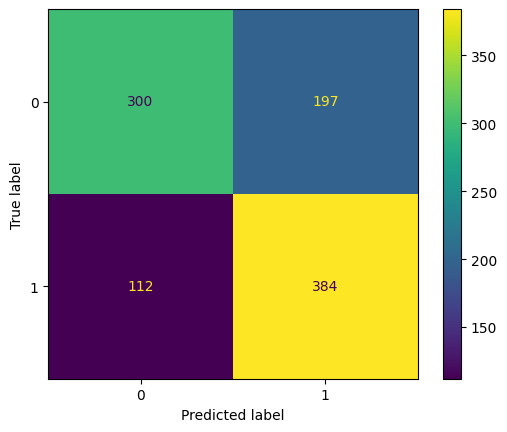

preprocessor: ColumnTransformer(transformers=[('drop_cols', 'drop', ['duration', 'month']),
                                ('std_scale', StandardScaler(),
                                 ['age', 'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed']),
                                ('one_hot', OneHotEncoder(),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'poutcome', 'education',
                                  'day_of_week', 'contact'])])
classifier: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Get project path
cwd = os.getcwd()
print(cwd)

# Download test dataset
bank_full = pd.read_csv(os.path.join(cwd, "data", "bank-additional-full.csv"), sep=";")

bank_full.y = bank_full.y.map({"yes": 1, "no":0})
bank_stable = bank_full.iloc[36224:].reset_index(drop=True)

# chronological train/test split
train_size = 0.8
split = int(len(bank_stable)*train_size)
train_set = bank_stable.iloc[:split].copy()
test_set = bank_stable.iloc[split:].copy()

# Split X and y from train dataset
X_test = test_set.drop(columns=['y'])

# Map target
y_test = test_set.y

# Best trained model
model_id = "saved_pipelines\Random_Forest_pipeline_1763222817.pkl" 

# Load corresponding pipeline
pipeline = joblib.load(os.path.join(cwd, model_id))

# Predict
y_pred = pipeline.predict(X_test)

# Display metrics, objective is to maximize recall since y distribution is very imbalanced
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 score :", f1_score(y_test, y_pred))

new_row = {
    'Pipeline_file': model_id,
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred),
}

# Update logs
logs = pd.concat([pd.read_csv(os.path.join(cwd, 'data', 'test_logs.csv')), pd.DataFrame([new_row])], ignore_index=True)
logs.to_csv(os.path.join(os.getcwd(), 'data', 'test_logs.csv'), index=False)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

for step_name, step in pipeline.steps:
    print(f"{step_name}: {step}")
